# Install packages

In [1]:
# !pip install SciFiReaders
!pip install aespm
!pip install igor2==0.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 26.4 MB/s eta 0:00:00
  Attempting uninstall: igor2
    Found existing installation: igor2 0.5.8
    Uninstalling igor2-0.5.8:
      Successfully uninstalled igor2-0.5.8


In [2]:
# @title
#!pip install atomai pyroved
#!pip install -q git+https://github.com/ziatdinovmax/pyroVED@main
!pip install gdown==4.6.0
!pip install -q git+https://github.com/ziatdinovmax/pyroved.git
!pip install -q git+https://github.com/pycroscopy/atomai.git

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00


In [3]:
from copy import deepcopy as dc

import aespm
import numpy as np
import torch

from skimage.feature import blob_dog, blob_log, blob_doh
from scipy import fftpack, ndimage
import cv2

from sklearn import decomposition
from sklearn.cluster import MeanShift
from sklearn.ensemble import IsolationForest

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pyroved as pv
#import atomai as aoi

# from SciFiReaders import IgorIBWReader
import atomai as aoi
# from aoi.utils import

In [4]:
# @title
# Help function to crop images into patches
from typing import Tuple, Optional, Dict, Union, List

# def get_imgstack(imgdata: np.ndarray,
#                  coord: np.ndarray,
#                  r: int) -> Tuple[np.ndarray]:
#     """
#     Extracts subimages centered at specified coordinates
#     for a single image
#     Args:
#         imgdata (3D numpy array):
#             Prediction of a neural network with dimensions
#             :math:`height \\times width \\times n channels`
#         coord (N x 2 numpy array):
#             (x, y) coordinates
#         r (int):
#             Window size
#     Returns:
#         2-element tuple containing
#         - Stack of subimages
#         - (x, y) coordinates of their centers
#     """
#     img_cr_all = []
#     com = []
#     for c in coord:
#         cx = int(np.around(c[0]))
#         cy = int(np.around(c[1]))
#         if r % 2 != 0:
#             img_cr = np.copy(
#                 imgdata[cx-r//2:cx+r//2+1,
#                         cy-r//2:cy+r//2+1])
#         else:
#             img_cr = np.copy(
#                 imgdata[cx-r//2:cx+r//2,
#                         cy-r//2:cy+r//2])
#         if img_cr.shape[0:2] == (int(r), int(r)) and not np.isnan(img_cr).any():
#             img_cr_all.append(img_cr[None, ...])
#             com.append(c[None, ...])
#     if len(img_cr_all) == 0:
#         return None, None
#     img_cr_all = np.concatenate(img_cr_all, axis=0)
#     com = np.concatenate(com, axis=0)
#     return img_cr_all, com


# def extract_subimages(imgdata: np.ndarray,
#                       coordinates: Union[Dict[int, np.ndarray], np.ndarray],
#                       window_size: int, coord_class: int = 0) -> Tuple[np.ndarray]:

#     if isinstance(coordinates, np.ndarray):
#         coordinates = np.concatenate((
#             coordinates, np.zeros((coordinates.shape[0], 1))), axis=-1)
#         coordinates = {0: coordinates}
#     if np.ndim(imgdata) == 2:
#         imgdata = imgdata[None, ..., None]
#     subimages_all, com_all, frames_all = [], [], []
#     for i, (img, coord) in enumerate(
#             zip(imgdata, coordinates.values())):
#         coord_i = coord[np.where(coord[:, 2] == coord_class)][:, :2]
#         stack_i, com_i = get_imgstack(img, coord_i, window_size)
#         if stack_i is None:
#             continue
#         subimages_all.append(stack_i)
#         com_all.append(com_i)
#         frames_all.append(np.ones(len(com_i), int) * i)
#     if len(subimages_all) > 0:
#         subimages_all = np.concatenate(subimages_all, axis=0)
#         com_all = np.concatenate(com_all, axis=0)
#         frames_all = np.concatenate(frames_all, axis=0)

#     return subimages_all, com_all, frames_all

# Download file (fell free to replace the file with your own filename)

In [5]:
# Download a testing image

!gdown 1hr8zVqahz0GF62zNtk_hQLKT34xK8yeu

Downloading...
From: https://drive.google.com/uc?id=1hr8zVqahz0GF62zNtk_hQLKT34xK8yeu
To: /content/HeightCali0001.ibw
100% 1.15M/1.15M [00:00<00:00, 82.8MB/s]


In [6]:
# Read the data from AR
# Replace the data with your own image name
# dataset = IgorIBWReader("HeightCali0001.ibw").read()
dataset = aespm.tools.load_ibw('HeightCali0001.ibw')
dataset.size

2e-05

In [7]:
# # Upload your own .ibw file by uncommenting this cell:

# from google.colab import files

# uploaded = files.upload()

In [8]:
# # Read the data from AR
# # Replace the data with your own image name
# dataset = IgorIBWReader("your_file_name").read()
# dataset

Text(0, 0.5, 'y ($\\mu$m)')

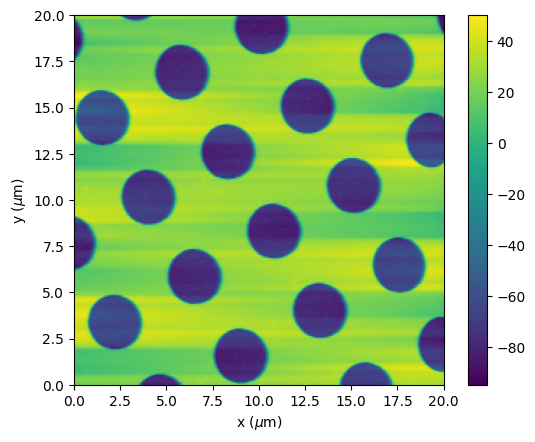

In [9]:
# Take the ZSensorRetrace (m) image out
img = dataset.data[-1]
plt.imshow(img * 1e9, extent=[0, 20, 0, 20], origin='lower')
plt.colorbar()
plt.xlabel("x ($\mu$m)")
plt.ylabel("y ($\mu$m)")

# VAE Analysis

In [10]:
# Normalize the image before analysis
d1, d2 = np.shape(img)
image = np.copy(img)
image = (image - np.min(image)) / np.ptp(image)

In [11]:
# Generate the coordinates for all the grid points
skip = 1
# coordinates = aoi.utils.get_coord_grid(image[::skip,::skip], step = 1, return_dict=False)
coordinates = aespm.tools.get_coord_grid(image[::skip,::skip], step = 1, return_dict=False)

# coordinates

In [12]:
# Crop the image into small patches
# We need to crop the whole image into small patched before running VAE

window_size = 10
patches, coords, _ = aespm.tools.extract_subimages(image[::skip, ::skip], coordinates, window_size)
patches = patches.squeeze()
np.shape(patches), np.shape(coords)


((61009, 10, 10), (61009, 2))

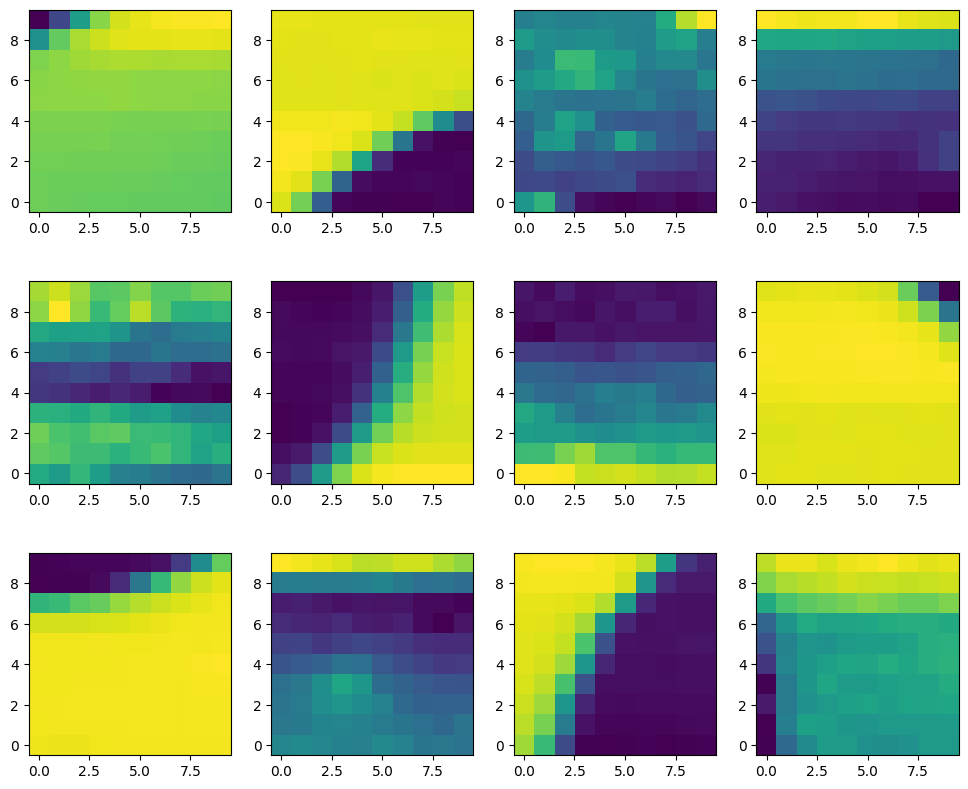

In [13]:
fig, ax = plt.subplots(3, 4, figsize=[12, 10])
radn_index = np.random.randint(0, len(patches), 12)
for i in range(12):
    ax[i//4, i%4].imshow(patches[radn_index[i]], origin='lower')


## Vanilla VAE

In [14]:
# Running the model with atomai rvae
input_dim = (window_size,window_size)
vae = aoi.models.VAE(input_dim, latent_dim=2,
                    numlayers_encoder=3, numhidden_encoder=1024,
                    numlayers_decoder=3, numhidden_decoder=1024,
                    skip=True)

# Change the training_cycles to match the complexity of your image
vae.fit(patches, training_cycles=50, batch_size=64, loss="ce",
         filename='vae')

Epoch: 1/50, Training loss: 50.5670
Epoch: 2/50, Training loss: 49.9184
Epoch: 3/50, Training loss: 49.7360
Epoch: 4/50, Training loss: 49.4738
Epoch: 5/50, Training loss: 49.2758
Epoch: 6/50, Training loss: 49.1251
Epoch: 7/50, Training loss: 49.0262
Epoch: 8/50, Training loss: 48.8831
Epoch: 9/50, Training loss: 48.8315
Epoch: 10/50, Training loss: 48.7738
Epoch: 11/50, Training loss: 48.7467
Epoch: 12/50, Training loss: 48.7003
Epoch: 13/50, Training loss: 48.6666
Epoch: 14/50, Training loss: 48.6324
Epoch: 15/50, Training loss: 48.5949
Epoch: 16/50, Training loss: 48.5968
Epoch: 17/50, Training loss: 48.5747
Epoch: 18/50, Training loss: 48.5745
Epoch: 19/50, Training loss: 48.5463
Epoch: 20/50, Training loss: 48.5223
Epoch: 21/50, Training loss: 48.4920
Epoch: 22/50, Training loss: 48.5014
Epoch: 23/50, Training loss: 48.4752
Epoch: 24/50, Training loss: 48.4998
Epoch: 25/50, Training loss: 48.4321
Epoch: 26/50, Training loss: 48.4663
Epoch: 27/50, Training loss: 48.4303
Epoch: 28/

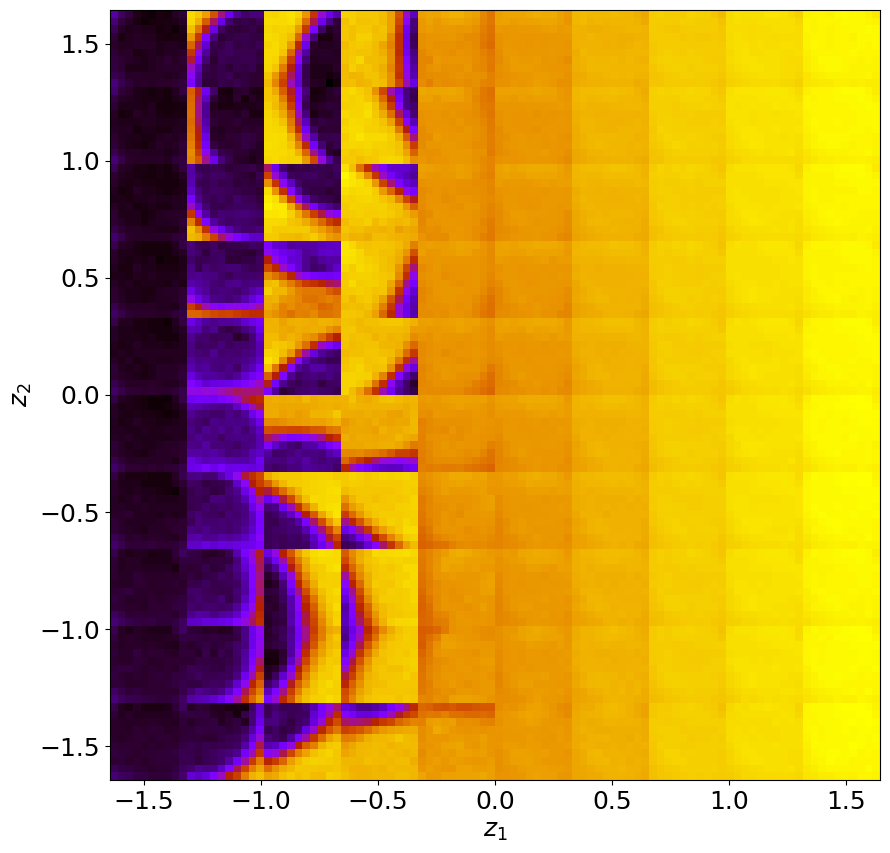

array([[0.18237887, 0.17008427, 0.16559052, ..., 0.8896023 , 0.88933235,
        0.88657886],
       [0.16754787, 0.15869012, 0.15627345, ..., 0.89078993, 0.89503384,
        0.89159155],
       [0.14810681, 0.15190288, 0.14448257, ..., 0.88963425, 0.88939863,
        0.88967568],
       ...,
       [0.16624758, 0.14205855, 0.13616779, ..., 0.89275479, 0.895827  ,
        0.89253986],
       [0.18178004, 0.15421313, 0.14145657, ..., 0.89284545, 0.89069676,
        0.88659197],
       [0.21251141, 0.17410381, 0.15461811, ..., 0.89377546, 0.88717866,
        0.87887365]])

In [15]:
# Latent representation
vae.manifold2d(d = 10, origin='lower')

### Find patches at a given latent position





In [16]:
# Encode all the patches:
#   compute the (Z1, Z2) values for each patch
m, s = vae.encode(patches)

In [17]:
m.shape, s.shape

((61009, 2), (61009, 2))

Text(0, 0.5, 'Z2')

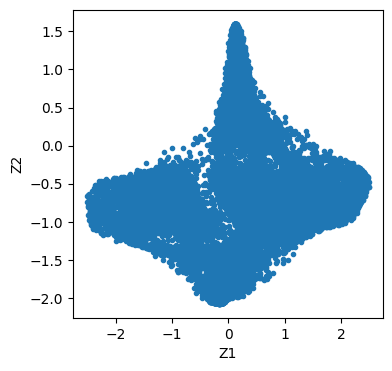

In [23]:
plt.figure(figsize=[4,4])
plt.plot(m[:,0], m[:,1], '.')
plt.xlabel("Z1")
plt.ylabel("Z2")

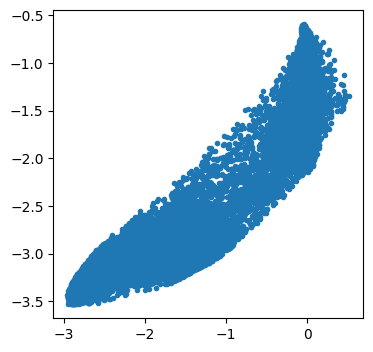

In [19]:
plt.figure(figsize=[4,4])
plt.plot(s[:,0], s[:,1], '.')

<ipython-input-25-951431392124>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=m[:, -1], y=m[:, -2], cmap="Blues", levels = 50, shade=True)


Text(0, 0.5, '$Z_2$')

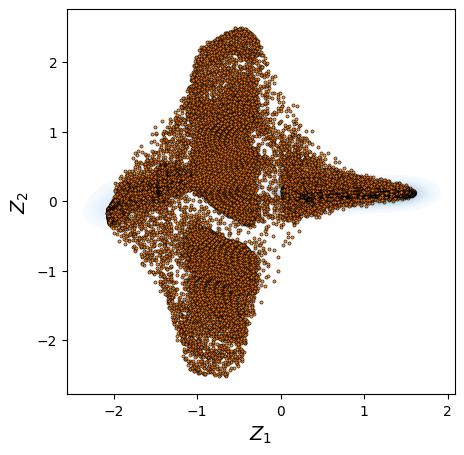

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(5, 5), facecolor='white')
# KDE plot
sns.kdeplot(x=m[:, -1], y=m[:, -2], cmap="Blues", levels = 50, shade=True)

# Scatter plot
sc = plt.scatter(m[:, -1], m[:, -2],  s=5, alpha = 0.8, edgecolor='k', linewidth=0.5)

plt.xlabel("$Z_1$", fontsize=14)
plt.ylabel("$Z_2$", fontsize=14)

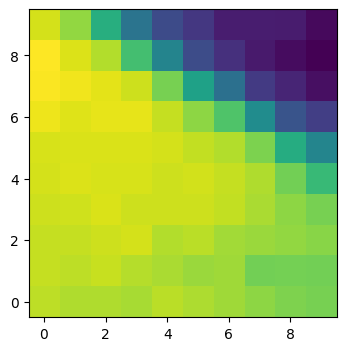

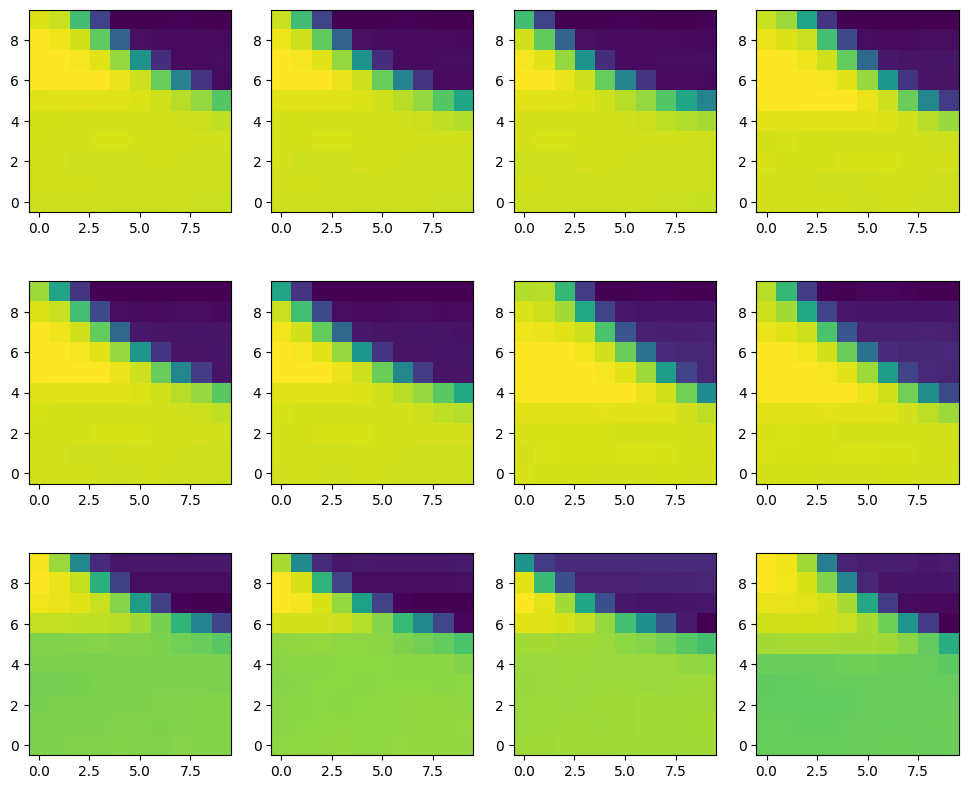

In [ ]:
# Choose a location in the latent space and then filter out patches
# with corresponding latent representation

z = [-0.6,-0.4]

# Adjust this thres value to control how close these patches are w.r.t. the selected latent values
thres = 0.15
index = np.where(np.sqrt((m[:,0]-z[0])**2 + (m[:,1]-z[1])**2) < thres)

plt.figure(figsize=[4,4])
plt.imshow(vae.decode(np.array(z)).squeeze(), origin='lower')
fix,ax=plt.subplots(3,4,figsize=[12, 10])
for i in range(12):
    ax[i//4, i%4].imshow(patches[index[0][i]], origin='lower')
    # print(coordinates[index[i]])


137


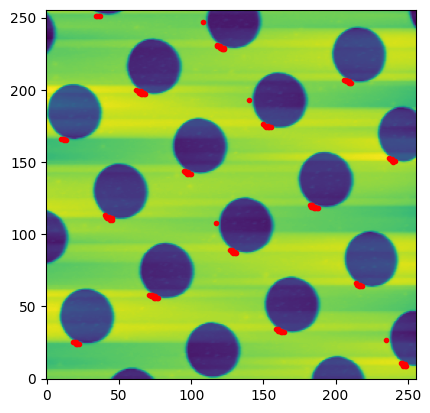

In [ ]:
# Visualize these patches in the original image

coord = np.array(coords[index])
# len(coord)
# coord
print(len(coord))

plt.imshow(img, origin='lower')
plt.plot(coord[:,1], coord[:,0], 'r.')

### Generate patches with the trained model

One fascinating thing about VAE is that the trained model has a two-way function:

* It can compress image into the latent space (characteristic feature space) by computing the latent representations of each image: encode image --> latent space
* It can also ___generate___ images with chosen features by selecting a location in the latent space: decode latent representation --> image (generated instead of measured!)

Here is an example:

Text(0.5, 1.0, 'Measured patch')

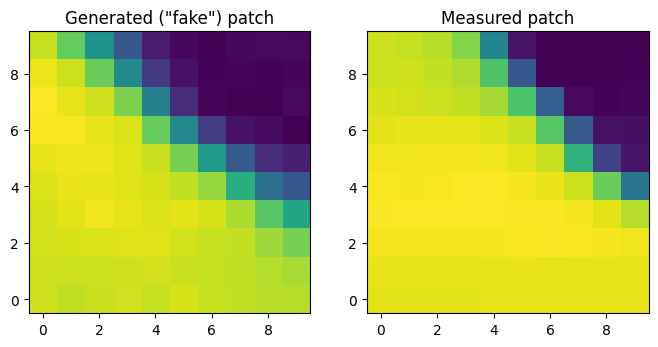

In [ ]:
# We ask the VAE to create a "fake" image by providing a latent representation
z = [-0.75, -0.5]
img_generated = vae.decode(np.array(z)).squeeze()

thres = 0.1
index = np.where(np.sqrt((m[:,0]-z[0])**2 + (m[:,1]-z[1])**2) < thres)

fig,ax=plt.subplots(1,2,figsize=[8,4])
ax[0].imshow(img_generated, origin='lower')
ax[0].set_title('Generated ("fake") patch')
ax[1].imshow(patches[index[0][0]], origin='lower')
ax[1].set_title('Measured patch')


The image on the left is generated by the VAE model by providing z = (-0.75, -0.5).

The image on the right is one of the actually measured images that have the same latent representation z = (-0.75, -0.5).

## Rotation-invariant VAE (rVAE)

We can expel rotation from the latent representation: basically, for the same features that rotation angle is the only difference between them, they will be treated as the ___same___ feature by rVAE.

This is useful in many cases:

Imagine that you have the same nano-island, domain wall, impurity, but with different rotation angles. rVAE will classify them into the same category.

In [ ]:
tt = torch.tensor
patches = tt(1 - patches / patches.max())
train_loader1 = pv.utils.init_dataloader(patches[:, None], batch_size=64)

<ipython-input-46-ca6fd5084186>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  patches = tt(1 - patches / patches.max())


In [ ]:
# Training the rVAE

in_dim = (window_size, window_size)  # Input dimensions of the dataset

# Initialize probabilistic VAE model ->
# (invariances=None: vanilla VAE
#  invariances=['r']: enforces rotational invariance
#  invariances=['t']: enforces translational invariance
#  invariances=['r', 't']: enforces invariance to rotations & translations
#  etc.)


rvae1 = pv.models.iVAE(in_dim, latent_dim=2,  # Number of latent dimensions other than the invariancies
                      hidden_dim_e = [256, 256], # corresponds to the number of neurons in the hidden layers of the encoder
                     hidden_dim_d = [256, 256],  # corresponds to the number of neurons in the hidden layers of the decoder
                     invariances= ['r'], seed=0)

# Initialize SVI trainer
trainer1 = pv.trainers.SVItrainer(rvae1)

# Train for n epochs:
for e in range(50):
    trainer1.step(train_loader1)
    trainer1.print_statistics()

Epoch: 1 Training loss: 50.8812
Epoch: 2 Training loss: 49.4077
Epoch: 3 Training loss: 48.9541
Epoch: 4 Training loss: 48.8179
Epoch: 5 Training loss: 48.7470
Epoch: 6 Training loss: 48.7325
Epoch: 7 Training loss: 48.6826
Epoch: 8 Training loss: 48.6874
Epoch: 9 Training loss: 48.6369
Epoch: 10 Training loss: 48.6164
Epoch: 11 Training loss: 48.6124
Epoch: 12 Training loss: 48.5685
Epoch: 13 Training loss: 48.5715
Epoch: 14 Training loss: 48.5780
Epoch: 15 Training loss: 48.5357
Epoch: 16 Training loss: 48.5625
Epoch: 17 Training loss: 48.5394
Epoch: 18 Training loss: 48.5459
Epoch: 19 Training loss: 48.5556
Epoch: 20 Training loss: 48.5346
Epoch: 21 Training loss: 48.5206
Epoch: 22 Training loss: 48.5205
Epoch: 23 Training loss: 48.5275
Epoch: 24 Training loss: 48.5002
Epoch: 25 Training loss: 48.5408
Epoch: 26 Training loss: 48.5557
Epoch: 27 Training loss: 48.5127
Epoch: 28 Training loss: 48.5110
Epoch: 29 Training loss: 48.4879
Epoch: 30 Training loss: 48.4880
Epoch: 31 Training 

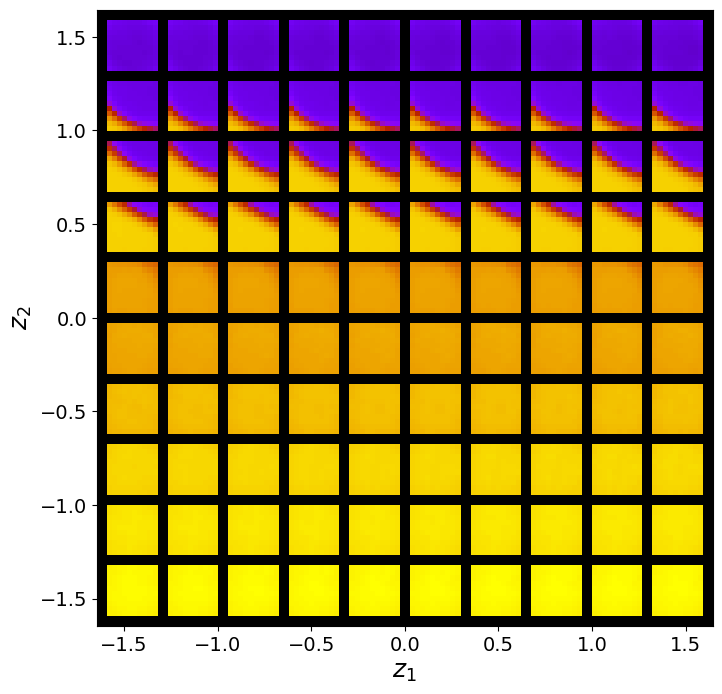

In [ ]:
# Visualizing latent representations: decoded latent space
# The latent space is uniformly sampled in z1-z2 latent dimensions.
# These points are decoded back into the image space and are plotted in their corresponding latent space positions

rvae1.manifold2d(d = 10);   # d corresponds to the number of points sampled in each latent dimension; try changing it

Notice how each row now has the same orientation!


### Experiment with rVAE

In [ ]:
# Encode all the patches:
#   compute the (Z1, Z2) values for each patch


# z_mean, z_sd = rvae.encode(imstack)
# z1, z2, z3 = z_mean[:,0], z_mean[:, 1:3], z_mean[:, 3:]
#-> z1 is encoded angle rest z2 and z3 are as usal latent variables


        # if 'r' in self.invariances: -------------> base vae in pyroved
        #     phi = z[:, 0]
        #     z = z[:, 1:]
        # if 't' in self.invariances:
        #     dx = z[:, :2]
        #     z = z[:, 2:]
        # if 's' in self.invariances:
        #     sc = sc + self.sc_prior * z[:, 0]
        #     z = z[:, 1:]

z_mean, z_sd = rvae1.encode(patches)
np.shape(z_mean)

torch.Size([61009, 3])

Notice that there are three latent variables (z_mean.shape[-1] = 3). The first one is the angle latent variable by default, and the two other latent variables are the two that we specified in the training process.

### Filter patches according to the last two latent variables (exclude angle latent variable)

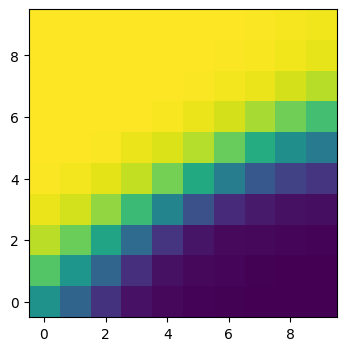

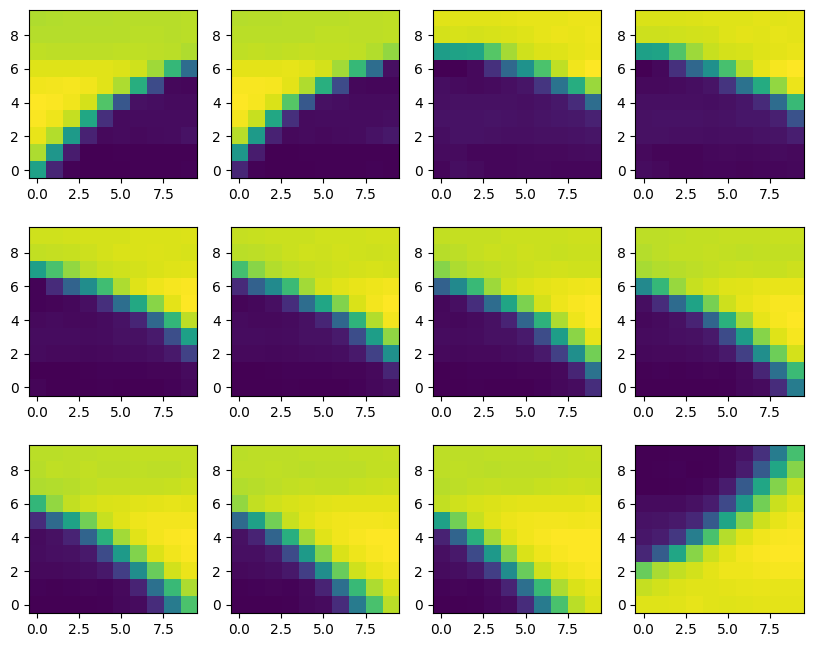

In [ ]:
z = [0.6, -0.4]

# Adjust this thres value to control how close these patches are w.r.t. the selected latent values
thres = 0.5
index = np.where(np.sqrt((z_mean[:,1]-z[0])**2 + (z_mean[:,2]-z[1])**2  ) < thres)

plt.figure(figsize=[4,4])
plt.imshow(rvae1.decode(torch.Tensor(np.array(z)))[0].squeeze(), origin='lower')# index "0" as repeating, rvae decode also takes just z1 and z2 not z0
fix,ax=plt.subplots(3,4,figsize=[10, 8])
for i in range(12):
    ax[i//4, i%4].imshow(patches[index[0][i]], origin='lower')
    # print(coordinates[index[i]])

3780


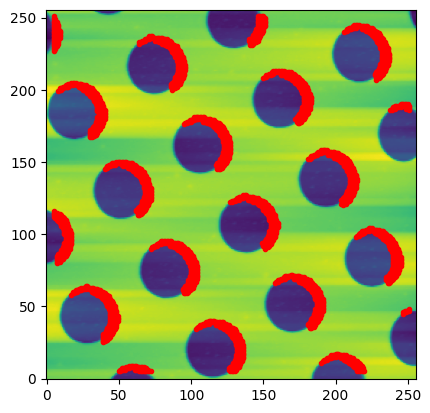

In [ ]:
# Visualize these patches in the original image

coord = np.array(coords[index])
# len(coord)
# coord
print(len(coord))
plt.imshow(img, origin='lower')
plt.plot(coord[:,1], coord[:,0], 'r.')

Text(0.5, 1.0, 'Measured patch')

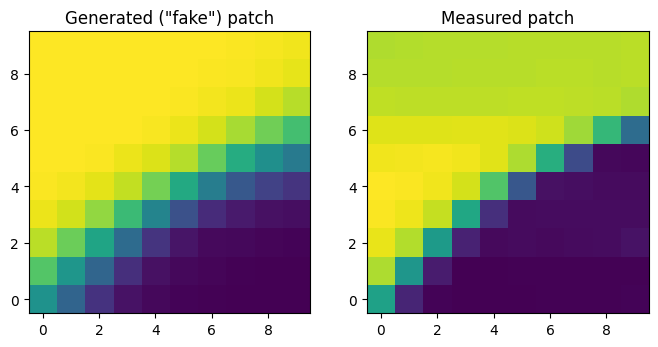

In [ ]:
# We ask the RVAE to create a "fake" image by providing a latent representation
z = [0.6, -0.4]
img_generated = rvae1.decode(torch.Tensor(np.array(z)))[0].squeeze()

thres = 0.5
index = np.where(np.sqrt((z_mean[:,1]-z[0])**2 + (z_mean[:,2]-z[1])**2  ) < thres)

fig,ax=plt.subplots(1,2,figsize=[8,4])
ax[0].imshow(img_generated, origin='lower')
ax[0].set_title('Generated ("fake") patch')
ax[1].imshow(patches[index[0][0]], origin='lower')# "IndexError: index 0 is out of bounds for axis 0 with size 0" --> means ther is no image with that attribute: increase threshold?
ax[1].set_title('Measured patch')


### Beauty of rVAE: we can sample at specific angle

In [ ]:
z_mean, z_sd = rvae1.encode(patches)

Text(0.5, 1.0, 'vae encoded angle for all patches')

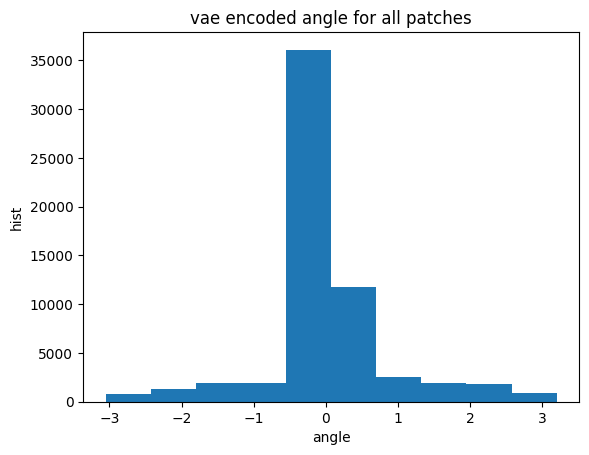

In [ ]:
plt.hist(z_mean[:,0])
plt.xlabel("angle in radians")
plt.ylabel("hist")
plt.title("vae encoded angle for all patches")

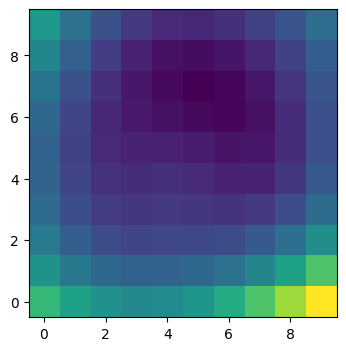

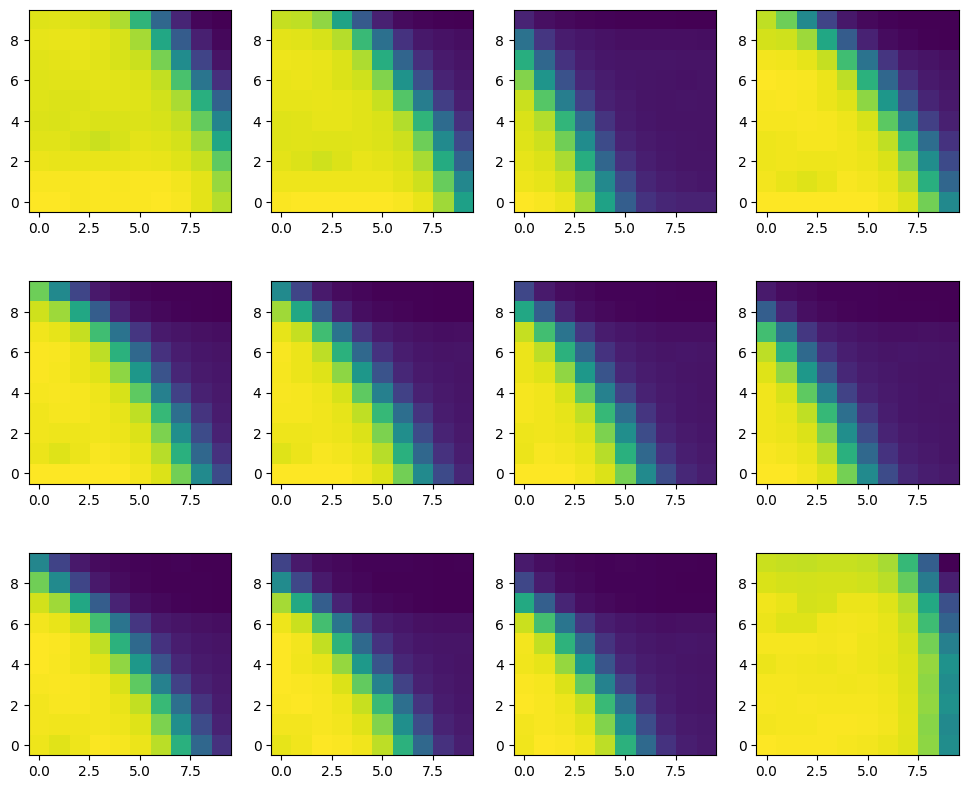

In [ ]:

# Adjust this thres value to control how close these patches are w.r.t. the selected latent values
thres = 0.05
# Here we're asking for patches with angles between -1.6 and -1.5 (rad):
condition =  (-1.6 <= z_mean[:,0]) & (z_mean[:,0] <= -1.5)
index = np.where(condition)

plt.figure(figsize=[4,4])
# plt.imshow(rvae1.decode(torch.Tensor(np.array(z)))[0].squeeze(), origin='lower')# index "0" as repeating, rvae decode also takes just z1 and z2 not z0
fix,ax=plt.subplots(3,4,figsize=[12, 10])
for i in range(12):
    ax[i//4, i%4].imshow(patches[index[0][i]], origin='lower')
    # print(coordinates[index[i]])

300


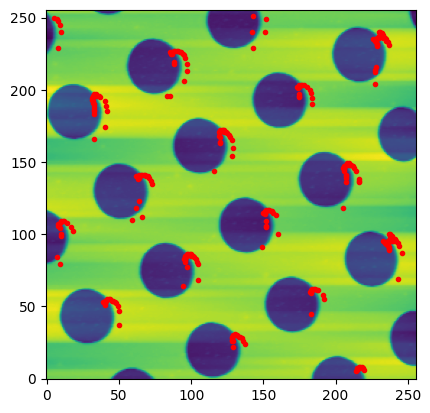

In [ ]:
# Visualize these patches in the original image

coord = np.array(coords[index])
# len(coord)
# coord
print(len(coord))
plt.imshow(img, origin='lower')
plt.plot(coord[:,1], coord[:,0], 'r.')

In [ ]:
# We choose a specific angle range : rvae gives us power to sample at specific angles

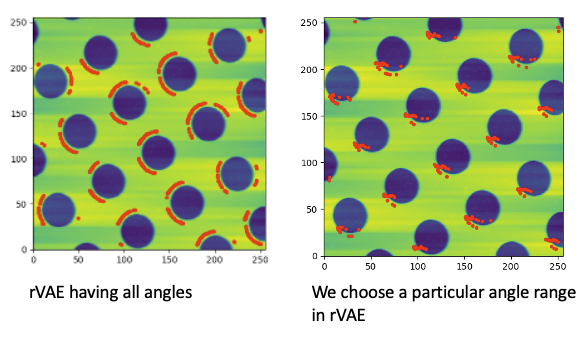

## Other types of invariant VAE

You can specify translational-invariant or rotational + translational invariant VAE:

In [ ]:
# Training the tVAE

in_dim = (window_size, window_size)  # Input dimensions of the dataset

# Initialize probabilistic VAE model ->
# (invariances=None: vanilla VAE
#  invariances=['r']: enforces rotational invariance
#  invariances=['t']: enforces translational invariance
#  invariances=['r', 't']: enforces invariance to rotations & translations
#  etc.)


tvae = pv.models.iVAE(in_dim, latent_dim=2,  # Number of latent dimensions other than the invariancies
                      hidden_dim_e = [256, 256], # corresponds to the number of neurons in the hidden layers of the encoder
                     hidden_dim_d = [256, 256],  # corresponds to the number of neurons in the hidden layers of the decoder
                     invariances= ['t'], seed=0)

# Initialize SVI trainer
trainer2 = pv.trainers.SVItrainer(tvae)

# Train for n epochs:
for e in range(50):
    trainer2.step(train_loader1)
    trainer2.print_statistics()

Epoch: 1 Training loss: 50.4996
Epoch: 2 Training loss: 49.7303
Epoch: 3 Training loss: 49.0649
Epoch: 4 Training loss: 48.8280


KeyboardInterrupt: 

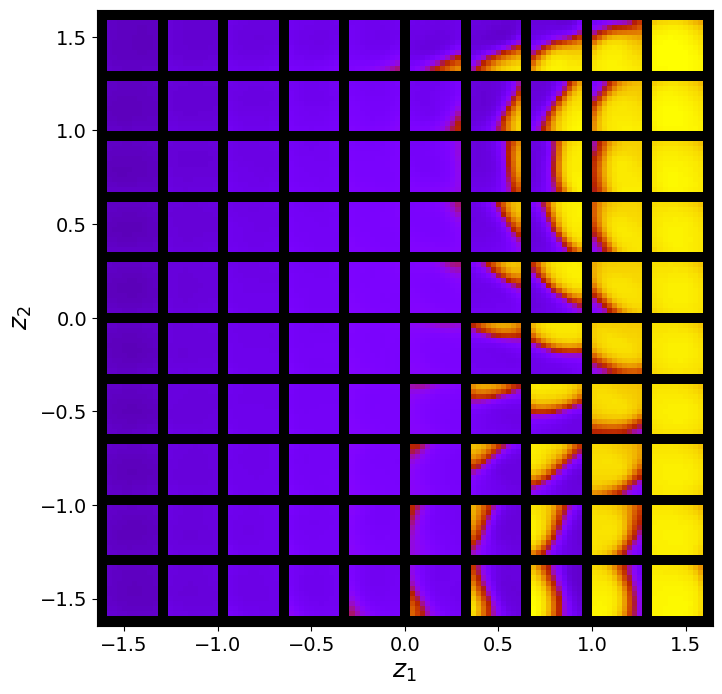

In [ ]:
tvae.manifold2d(d = 10);

In [ ]:
z_mean_tvae, z_sd_tvae = rvae1.encode(patches)

In [ ]:
z_mean_tvae.shape

torch.Size([61009, 3])

In [ ]:
# # Training the rtVAE

# in_dim = (window_size, window_size)  # Input dimensions of the dataset

# # Initialize probabilistic VAE model ->
# # (invariances=None: vanilla VAE
# #  invariances=['r']: enforces rotational invariance
# #  invariances=['t']: enforces translational invariance
# #  invariances=['r', 't']: enforces invariance to rotations & translations
# #  etc.)


# rvae3 = pv.models.iVAE(in_dim, latent_dim=2,  # Number of latent dimensions other than the invariancies
#                       hidden_dim_e = [256, 256], # corresponds to the number of neurons in the hidden layers of the encoder
#                      hidden_dim_d = [256, 256],  # corresponds to the number of neurons in the hidden layers of the decoder
#                      invariances= ['r', 't'], seed=0)

# # Initialize SVI trainer
# trainer3 = pv.trainers.SVItrainer(rvae3)

# # Train for n epochs:
# for e in range(50):
#     trainer3.step(train_loader1)
#     trainer3.print_statistics()

# Principle component analysis (PCA)

In [ ]:
# Same as VAE, let's extract small patches from the image so that we have
# enough samples to perform PCA

num_patches, d1, d2 = np.shape(patches)

flattened_dataset = patches.reshape(num_patches, -1)

In [ ]:
# @title
# # Select number of components
# nc = 10

# # Apply PCA
# pca = decomposition.PCA(n_components=nc)
# pca_result = pca.fit_transform(flattened_dataset)

# # Retrieve the principal components
# components = pca.components_.reshape(nc, d1, d2)

# rows = int(np.ceil(float(nc)/4))
# cols = int(np.ceil(float(nc)/rows))

# print('NUMBER OF COMPONENTS: ' + str(nc))
# print('Components...')
# gs1 = gridspec.GridSpec(rows, cols)
# fig1 = plt.figure(figsize = (4*cols, 3.5*(1+rows)//1.5))
# for i in range(nc):
#     ax1 = fig1.add_subplot(gs1[i])
#     ax1.imshow(components[i])
#     ax1.set_title('Component ' + str(i + 1))
# plt.show()

# # Visualize the transformed data (2D scatter plot)
# plt.figure(figsize=(8, 6))

# # Scatter plot of the first two principal components
# plt.scatter(pca_result[:, 0], pca_result[:, 1], marker='o', s=10, alpha=0.5)

# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('Distribution of the first two components')

# plt.show()

In [ ]:
# Select number of components
nc = 2

# Apply PCA
pca = decomposition.PCA(n_components=nc)
X_pca = pca.fit_transform(flattened_dataset)# num_patches*2




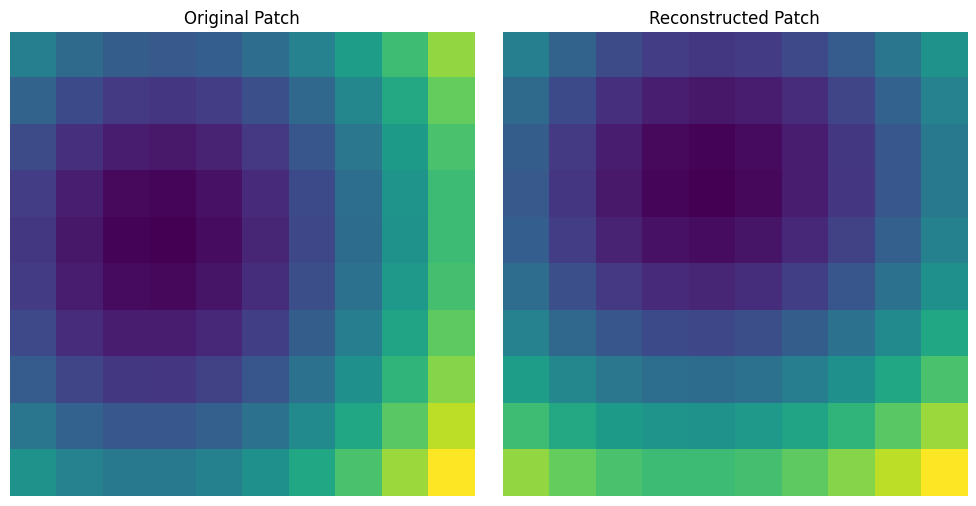

In [ ]:
demo_patch = pca.inverse_transform(X_pca[0])  # Use inverse_transform to simulate an original patch

# Visualizing the original and reconstructed patch side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original patch visualization
ax[0].imshow(demo_patch.reshape(d1, d2))
ax[0].set_title('Original Patch')
ax[0].axis('off')

# Reconstructed patch visualization after PCA inverse transform
ax[1].imshow(pca.inverse_transform(X_pca[0]).reshape(d1, d2).T)  # Transpose if needed
ax[1].set_title('Reconstructed Patch')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
z = [-0.75, -0.5]

In [ ]:
thres = 0.1
index_pca = np.where(np.sqrt((X_pca[:,0]-z[0])**2 + (X_pca[:,1]-z[1])**2) < thres)

27


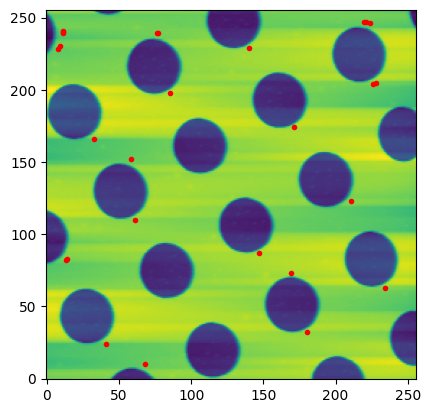

In [ ]:
# Visualize these patches in the original image
# note vae detected symmetery around all the blobs while pca misses on some blobs ->
coord = np.array(coords[index_pca])
# len(coord)
# coord
print(len(coord))
plt.imshow(img, origin='lower')
plt.plot(coord[:,1], coord[:,0], 'r.')

# Summary

below image shows that VAE perfoms better in terms of pca in finding semantic similar patches consistently

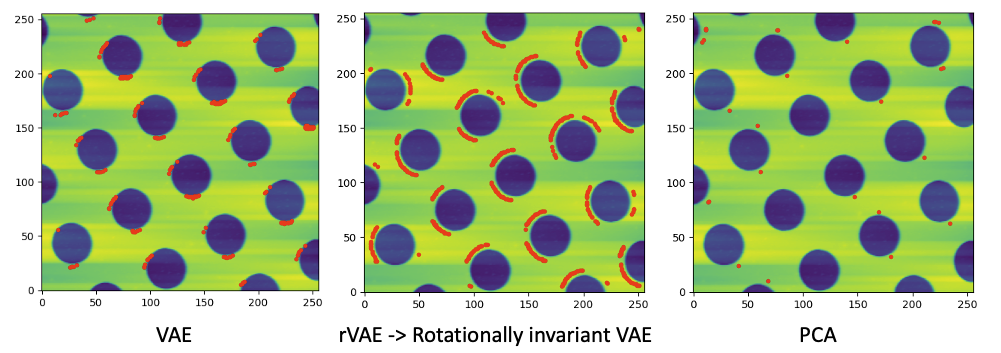